# LAB 6 - TEXT ANALYTICS / INTRO TO NATURAL LANGUAGE PROCESSING

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = 'tweets.csv'
tweets = pd.read_csv(fname)
tweets.head(10)

,Tweet,Avg
0,"IMO, @apple's new #iphone 5S/C was meant to co...",0.0
1,RT @SWAGGA_L: THE WORST ! RT @Mati_uCurvegawd...,-0.8
2,@mog_sharif @Apples @Android @Microsoft @Apple...,0.0
3,I hope the 5s battery life is better than the ...,-1.0
4,@DeltaAssist *EP it gets worse. The notificati...,-1.2
5,@Apple #iOS7..Everybody get ready to experienc...,1.0
6,Could @Apple & @PayPal announcements be game c...,0.0
7,"@apple, thank you so much for making all the i...",-1.0
8,@battalalgoos @apple,-0.2
9,@apple let iphones use gifs as wallpapers,0.0


In [3]:
tweets.info()
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   1181 non-null   object 
 1   Avg     1181 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


,Avg
count,1181.000000
mean,-0.193057
std,0.676421
min,-2.000000
25%,-0.600000
50%,0.000000
75%,0.200000
max,2.000000


In [4]:
# most_frequent_tweet = pd.DataFrame(tweets.describe()).loc['top'][0]
# tweets[tweets['Tweet'] == most_frequent_tweet]['Tweet']

In [5]:
# We want to predict negative sentiment
# Lets create a new variable called "Negative" that converts the 
# "sentiment" number to negative (or not negative)
# anything less than or equal to -1 is negative
 
tweets['Negative'] = (tweets['Avg'] <= -1).astype('int32').astype('object')

# And remove the old "Avg" column - we won't use it anymore

tweets.drop(columns=['Avg'], inplace=True)
tweets.head()

,Tweet,Negative
0,"IMO, @apple's new #iphone 5S/C was meant to co...",0
1,RT @SWAGGA_L: THE WORST ! RT @Mati_uCurvegawd...,0
2,@mog_sharif @Apples @Android @Microsoft @Apple...,0
3,I hope the 5s battery life is better than the ...,1
4,@DeltaAssist *EP it gets worse. The notificati...,1


Before going any further, lets understand the rough distribution of negative tweets in our data set:

0    999
1    182
Name: Negative, dtype: int64


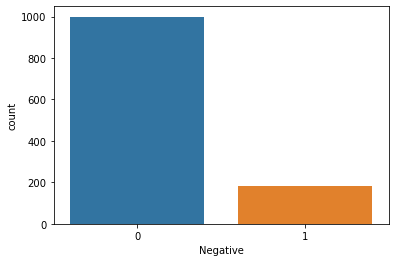

In [6]:
import seaborn as sns

sns.countplot(tweets['Negative'], order=tweets['Negative'].value_counts().index);
print(tweets['Negative'].value_counts())

## Cleaning Text

In [7]:
text = tweets['Tweet']
text

0       IMO, @apple's new #iphone 5S/C was meant to co...
1       RT @SWAGGA_L: THE WORST !  RT @Mati_uCurvegawd...
2       @mog_sharif @Apples @Android @Microsoft @Apple...
3       I hope the 5s battery life is better than the ...
4       @DeltaAssist *EP it gets worse. The notificati...
                              ...                        
1176    Why does @windowsphone and @Android constantly...
1177    Dear @Apple - I'm a little peeved at y'all not...
1178    {#IPODPLAYERPROMO #IPOD #IPAD #ITUNES #APPLE #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat Ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

### Change to Lowercase

In [8]:
text_lowercase = text.str.lower()
text_lowercase

0       imo, @apple's new #iphone 5s/c was meant to co...
1       rt @swagga_l: the worst !  rt @mati_ucurvegawd...
2       @mog_sharif @apples @android @microsoft @apple...
3       i hope the 5s battery life is better than the ...
4       @deltaassist *ep it gets worse. the notificati...
                              ...                        
1176    why does @windowsphone and @android constantly...
1177    dear @apple - i'm a little peeved at y'all not...
1178    {#ipodplayerpromo #ipod #ipad #itunes #apple #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

Or use the apply method:

In [9]:
text_lowercase = text.apply(str.lower)
text_lowercase

0       imo, @apple's new #iphone 5s/c was meant to co...
1       rt @swagga_l: the worst !  rt @mati_ucurvegawd...
2       @mog_sharif @apples @android @microsoft @apple...
3       i hope the 5s battery life is better than the ...
4       @deltaassist *ep it gets worse. the notificati...
                              ...                        
1176    why does @windowsphone and @android constantly...
1177    dear @apple - i'm a little peeved at y'all not...
1178    {#ipodplayerpromo #ipod #ipad #itunes #apple #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

### Remove Punctuation

In [10]:
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

In [11]:
text_no_punct = text_lowercase.apply(remove_punctuation)
text_no_punct

0       imo apples new iphone 5sc was meant to confuse...
1       rt swaggal the worst   rt matiucurvegawd yooo ...
2       mogsharif apples android microsoft apple thats...
3       i hope the 5s battery life is better than the ...
4       deltaassist ep it gets worse the notification ...
                              ...                        
1176    why does windowsphone and android constantly t...
1177    dear apple  im a little peeved at yall not doi...
1178    ipodplayerpromo ipod ipad itunes apple promo i...
1179                           xfrancesjoanna crocs apple
1180    mediacat ortada algilari etkileyecek ucuz bir ...
Name: Tweet, Length: 1181, dtype: object

### Remove Digits

In [12]:
# from string import digits 
  
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
#     no_digit = ''.join([character for character in document if character.isalpha()])
#     res = ''.join([i for i in ini_string if not i.isdigit()])
#     list = [''.join(x for x in i if x.isalpha()) for i in list] 
              
    return no_digit

In [13]:
text_no_digit = text_no_punct.apply(remove_digit)
text_no_digit

0       imo apples new iphone sc was meant to confuse ...
1       rt swaggal the worst   rt matiucurvegawd yooo ...
2       mogsharif apples android microsoft apple thats...
3       i hope the s battery life is better than the  ...
4       deltaassist ep it gets worse the notification ...
                              ...                        
1176    why does windowsphone and android constantly t...
1177    dear apple  im a little peeved at yall not doi...
1178    ipodplayerpromo ipod ipad itunes apple promo i...
1179                           xfrancesjoanna crocs apple
1180    mediacat ortada algilari etkileyecek ucuz bir ...
Name: Tweet, Length: 1181, dtype: object

### Tokenization 

In order to do certain word-related manipulations, we will first tokenize the text, i.e. transform the complete text string into a vector of words

In [14]:
from nltk.tokenize import word_tokenize

text_tokenized = text_no_digit.apply(word_tokenize)
text_tokenized.head()

0    [imo, apples, new, iphone, sc, was, meant, to,...
1    [rt, swaggal, the, worst, rt, matiucurvegawd, ...
2    [mogsharif, apples, android, microsoft, apple,...
3    [i, hope, the, s, battery, life, is, better, t...
4    [deltaassist, ep, it, gets, worse, the, notifi...
Name: Tweet, dtype: object

### Remove Stopwords

In [15]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Together with the stopwords, we want to remove also the word "apple", as this is a word common to all of our tweets

In [16]:
stop_words.add('apple')

In [17]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

In [18]:
text_no_stop = text_tokenized.apply(remove_stopwords)
text_no_stop

0       [imo, apples, new, iphone, sc, meant, confuse,...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2       [mogsharif, apples, android, microsoft, thats,...
3       [hope, battery, life, better, day, isnt, even,...
4       [deltaassist, ep, gets, worse, notification, r...
                              ...                        
1176    [windowsphone, android, constantly, try, compe...
1177    [dear, im, little, peeved, yall, c, preorders,...
1178    [ipodplayerpromo, ipod, ipad, itunes, promo, i...
1179                              [xfrancesjoanna, crocs]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

### Stemming

In [19]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

In [20]:
text_stemmed = text_no_stop.apply(stemmer)
text_stemmed

0       [imo, appl, new, iphon, sc, meant, confus, rus...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2       [mogsharif, appl, android, microsoft, that, ve...
3       [hope, batteri, life, better, day, isnt, even,...
4       [deltaassist, ep, get, wors, notif, remain, ev...
                              ...                        
1176    [windowsphon, android, constantli, tri, compet...
1177    [dear, im, littl, peev, yall, c, preorder, ain...
1178    [ipodplayerpromo, ipod, ipad, itun, promo, ipo...
1179                               [xfrancesjoanna, croc]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

Seems we didn't catch all of the apples...

In [21]:
text_stemmed = text_stemmed.apply(lambda document: [word for word in document if not word == 'appl'])
text_stemmed

0       [imo, new, iphon, sc, meant, confus, russian, ...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2        [mogsharif, android, microsoft, that, veryright]
3       [hope, batteri, life, better, day, isnt, even,...
4       [deltaassist, ep, get, wors, notif, remain, ev...
                              ...                        
1176    [windowsphon, android, constantli, tri, compet...
1177    [dear, im, littl, peev, yall, c, preorder, ain...
1178    [ipodplayerpromo, ipod, ipad, itun, promo, ipo...
1179                               [xfrancesjoanna, croc]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

## Document-Term Matrix

We've finished our basic cleaning, so now we want to calculate frequencies of words across the tweets, this is called a document-term matrix or DTM

### Detokenization

In the previous section we tokenized the text in order to apply cleaning techniques. The sklearn package we will use performs tokenization automatically, so we will need to pass detokenized text to the DTM constructor

In [22]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

text_detokenized = text_stemmed.apply(TreebankWordDetokenizer().detokenize)
text_clean = text_detokenized

### DTM

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_clean)
sparse_dtm

<1181x3318 sparse matrix of type '<class 'numpy.int64'>'
	with 9184 stored elements in Compressed Sparse Row format>

`CountVectorizer` transforms our data into a 'Compressed Sparse Format' matrix. Storing the dtm in this format saves a lot of memory. We can then build a new `pandas` dataframe from this sparse dtm.

In [24]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=tweets.index)
dtm

,aaaaaappl,aapl,abrsm,absolut,abt,acampan,accept,access,accident,accion,...,youtub,youv,yr,yu,yurbud,ze,zifmstereo,zimmerman,zippo,zostac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


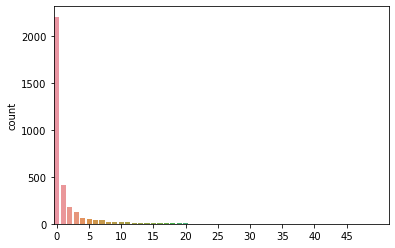

In [25]:
frequencies = dtm.sum().sort_values(ascending=False)

ax = sns.countplot(frequencies)
plt.xticks(np.arange(0, 50, step=5), np.arange(0, 50, step=5))
# plt.hist(frequencies, bins=len(frequencies))
plt.show()

In [26]:
print(frequencies[frequencies > 50])

iphon              335
itun               121
new                113
ipad                91
phone               86
get                 75
ipod                73
io                  62
ipodplayerpromo     60
make                60
freak               56
app                 54
im                  54
like                53
dtype: int64


We currently have way too many words, which will make it hard to train our models and may even lead to overfitting. Our solution to the possibility of overfitting is to only keep terms that appear in x% or more of the tweets. 

We can use the `min_df` parameter, where passing a `float` between `[0.0, 1.0]` will filter according to proportion of appearances in the documents, and passing an `int` will filter according to absolute count.

In [27]:
# ### TEST ####

# test = pd.Series({1: 'speak speak speak speak moment moment moment confusion confusion freight feel',
#                   2: 'speak speak speak speak moment moment moment confusion confusion freight feel',
#                   3: 'speak speak speak speak moment moment moment confusion confusion freight feel',})

# # test[test.str.contains("speak")]

# countvec_test = CountVectorizer(min_df=4)
# sparse_dtm_test = countvec_test.fit_transform(test)

# dtm_test = pd.DataFrame(sparse_dtm_test.toarray(), columns=countvec_test.get_feature_names(), index=test.index)
# dtm_test.sum().sort_values(ascending=False)

# ### END TEST

In [28]:
# 0.5% of the tweets or more (appears in 6 or more):

countvec2 = CountVectorizer(min_df=0.005)
sparse_dtm2 = countvec2.fit_transform(text_clean)

dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=tweets.index)
dtm2.sum().sort_values(ascending=False) 

iphon         335
itun          121
new           113
ipad           91
phone          86
             ... 
smart           6
read            6
true            6
tsuyoponzu      6
ok              6
Length: 326, dtype: int64

Note that word frequencies that we print are not the same as the min_df. 

In [29]:
# Now, let's try with 1% of the tweets or more (appears in 12 or more):

countvec3 = CountVectorizer(min_df=0.01)
sparse_dtm3 = countvec3.fit_transform(text_clean)

dtm3 = pd.DataFrame(sparse_dtm3.toarray(), columns=countvec3.get_feature_names(), index=tweets.index)
dtm3.sum().sort_values(ascending=False)

iphon     335
itun      121
new       113
ipad       91
phone      86
         ... 
differ     12
follow     12
wish       12
watch      12
care       12
Length: 123, dtype: int64

## Supervised Learning

### Train-test Split

In [30]:
from sklearn.model_selection import train_test_split

y = tweets['Negative'].astype('int32')
X = dtm3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((826, 123), (355, 123))

In [31]:
print(y_train.value_counts())
print(y_test.value_counts())

0    699
1    127
Name: Negative, dtype: int64
0    300
1     55
Name: Negative, dtype: int64


In [32]:
# Baseline accuracy
print('ACC', 300/(300 + 55))

ACC 0.8450704225352113


### Decision Tree Classifier with CV

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train)

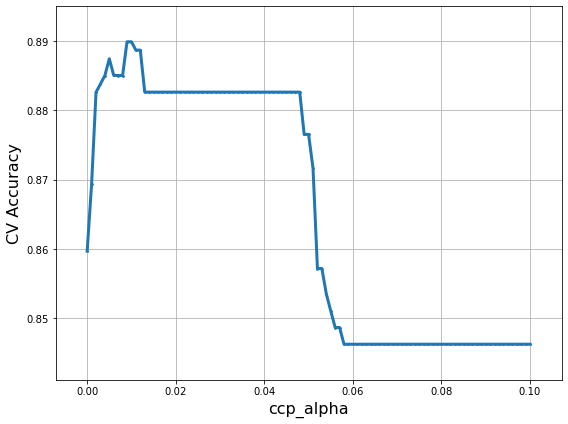

Best ccp_alpha {'ccp_alpha': 0.009000000000000001}


In [34]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 5


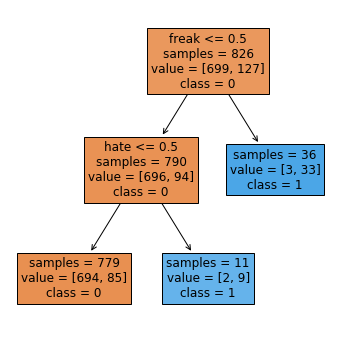

In [35]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[295   5]
 [ 38  17]]

Accuracy: 0.8788732394366198


### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [38]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[298   2]
 [ 42  13]]

Accuracy: 0.8760563380281691


### Random Forest Classifier with CV

In [39]:
import time

grid_values = {'max_features': np.linspace(1,120,120, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 1182.76 s


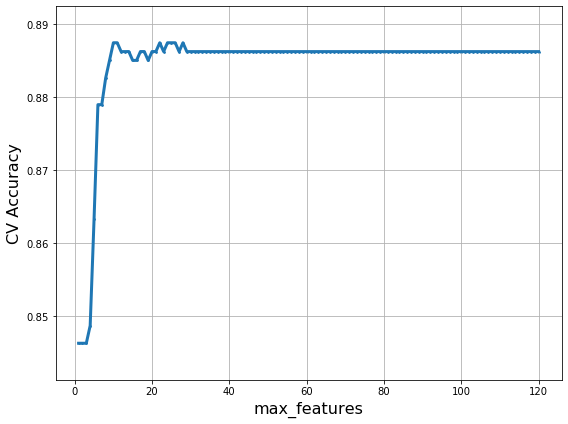

Best parameters {'max_features': 10, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [40]:
## ADDED PLOT
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [41]:
y_pred = rf_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[295   5]
 [ 38  17]]

Accuracy: 0.8788732394366198


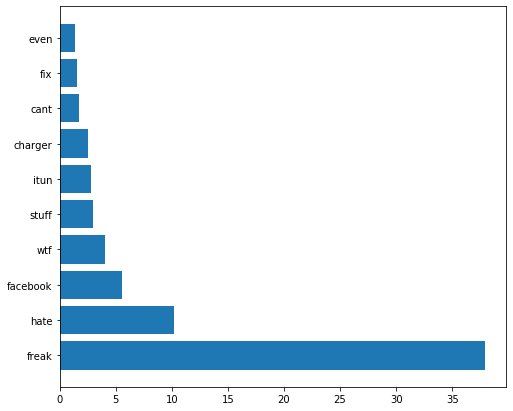

In [42]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.show()

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=88)

In [44]:
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[293   7]
 [ 36  19]]

Accuracy: 0.8788732394366198


Not as good as CART or RF. But what about the training set?

In [45]:
y_prob = logreg.predict_proba(X_train)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_train.index)

cm = confusion_matrix(y_train, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_train, y_pred))

Confusion Matrix: 
 [[693   6]
 [ 71  56]]

Accuracy: 0.9067796610169492


What about CART on training set?

In [46]:
y_pred = dtc_cv.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_train, y_pred))

Confusion Matrix: 
 [[694   5]
 [ 85  42]]

Accuracy: 0.8910411622276029


Quite similar to test set performance.

### Gradient Boosting Classifier with CV

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'max_leaf_nodes': np.linspace(2, 10, 8, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': np.logspace(6, 12, num=7, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'random_state': [88]} 

tic = time.time()

gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=5)
gbc_cv.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 536.72 s


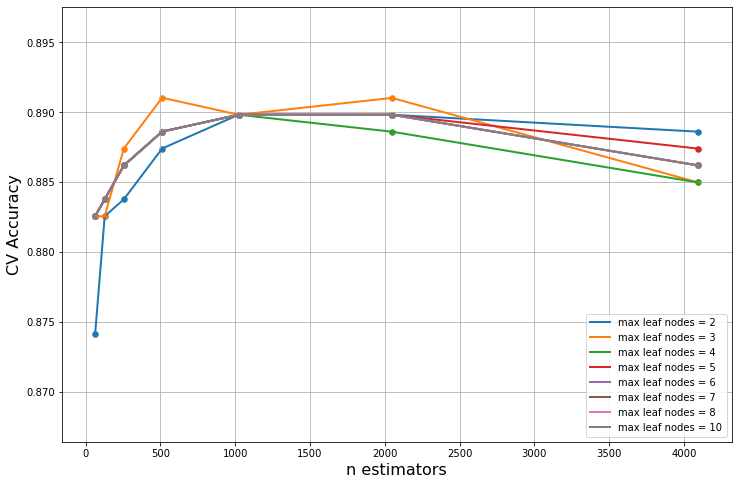

In [73]:
n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
R2_scores = gbc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [74]:
y_pred = gbc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[296   4]
 [ 38  17]]

Accuracy: 0.8816901408450705


### Linear Discriminant Analysis

Normally distributed features?

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [52]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[282  18]
 [ 34  21]]

Accuracy: 0.8535211267605634
